<a href="https://colab.research.google.com/github/ira235/Minimum-Wage-Analysis/blob/main/Copy_of_Minimum_Wage_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
outfile = open("kaggle.json","w")
outfile.write('{"username":"heejeyoo","key":"971b7979f94b629f1351b8574d482d76"}')
outfile.close()

In [ ]:
!mkdir /root/.kaggle
!mv kaggle.json /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [ ]:
api.dataset_download_file("peipeichen/minimum-wage-by-country","minimum_wage.csv")

Dataset URL: https://www.kaggle.com/datasets/peipeichen/minimum-wage-by-country


False

In [ ]:
api.dataset_download_file("hserdaraltan/countries-by-continent","Countries by continents.csv")

Dataset URL: https://www.kaggle.com/datasets/hserdaraltan/countries-by-continent


True

In [ ]:
import os

# Rename the file from encoded to plain text
os.rename('Countries%20by%20continents.csv', 'countries by continent.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("minimum_wage.csv")

In [ ]:
# Clean column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('\xa0', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
)

In [ ]:
# Rename for clarity
df = df.rename(columns={
    'annual-nominal_us$': 'annual_nominal_usd',
    'annual-ppp_int$': 'annual_ppp_usd',
    'hourly-nominal_us$': 'hourly_nominal_usd',
    'hourly-ppp_int$': 'hourly_ppp_usd'
})

In [ ]:
# Convert wage columns to numeric
wage_columns = [
    'annual_nominal_us$',
    'annual_ppp_int$',
    'hourly_nominal_us$',
    'hourly_ppp_int$'
]

for col in wage_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Drop rows with missing wage values
df = df.dropna(subset=wage_columns)

In [ ]:
# Adding Continents to Countries
continent_df = pd.read_csv('countries by continent.csv')
continent_df = continent_df.rename(columns={'Country': 'country'})
df = pd.merge(df, continent_df, on='country')

In [ ]:
#Cleaning Dates by Removing Month and Day and keeping year only
df['effective_per'] = df['effective_per'].astype(str).str[-4:]

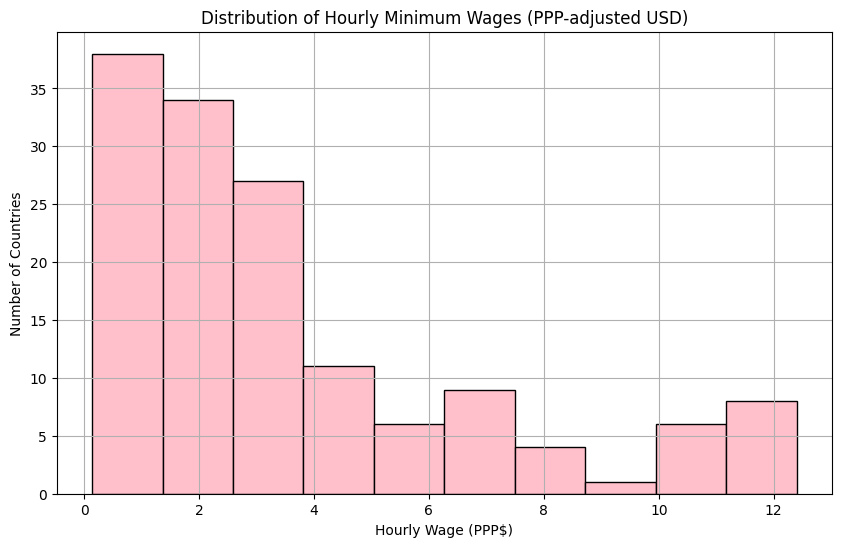

In [ ]:
# Question 4
plt.figure(figsize=(10, 6))
plt.hist(df['hourly_ppp_int$'].dropna(), bins=10, edgecolor='black', color='pink')
plt.title('Distribution of Hourly Minimum Wages (PPP-adjusted USD)')
plt.xlabel('Hourly Wage (PPP$)')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.show()


In [ ]:
df[['hourly_nominal_us$', 'hourly_ppp_int$','country']].describe().round(2)

,hourly_nominal_us$,hourly_ppp_int$
count,144.00,144.00
mean,2.56,3.64
std,3.26,3.21
min,0.06,0.14
25%,0.57,1.29
50%,1.27,2.60
75%,3.00,4.62
max,15.26,12.40


In [ ]:
df['ppp_ratio'] = df['hourly_ppp_int$'] / df['hourly_nominal_us$']


In [ ]:
highest_ppp = df[['country', 'hourly_nominal_us$', 'hourly_ppp_int$', 'ppp_ratio']].sort_values(by='ppp_ratio', ascending=False).head(10)

In [ ]:
highest_ppp

,country,hourly_nominal_us$,hourly_ppp_int$,ppp_ratio
9,Azerbaijan,0.84,4.12,4.904762
136,Ukraine,1.02,4.61,4.519608
6,Argentina,2.85,11.51,4.038596
12,Belarus,0.99,3.89,3.929293
98,Pakistan,0.69,2.62,3.797101
127,Tajikistan,0.17,0.62,3.647059
54,India,0.28,1.00,3.571429
125,Syria,0.40,1.37,3.425000
78,Malawi,0.12,0.41,3.416667
77,Madagascar,0.22,0.75,3.409091


In [ ]:
lowest_ppp = df[['country', 'hourly_nominal_us$', 'hourly_ppp_int$', 'ppp_ratio']].sort_values(by='ppp_ratio').head(10)
lowest_ppp

,country,hourly_nominal_us$,hourly_ppp_int$,ppp_ratio
83,Mauritania,0.48,0.14,0.291667
3,Andorra,6.85,5.30,0.773723
11,Barbados,3.13,2.54,0.811502
8,Australia,15.26,12.40,0.812582
59,Israel,8.09,6.59,0.814586
76,Luxembourg,14.12,11.85,0.839235
58,Ireland,11.92,10.10,0.847315
93,New Zealand,13.40,11.52,0.859701
141,Vanuatu,1.60,1.46,0.912500
82,Marshall Islands,2.00,1.88,0.940000


,country,hourly_nominal_us$,hourly_ppp_int$,ppp_diff
6,Argentina,2.85,11.51,8.66
126,Taiwan,5.26,12.12,6.86
133,Turkey,4.13,9.43,5.30
105,Poland,3.97,7.98,4.01
97,Oman,4.39,8.33,3.94
136,Ukraine,1.02,4.61,3.59
113,Saudi Arabia,3.85,7.43,3.58
107,Romania,2.96,6.35,3.39
9,Azerbaijan,0.84,4.12,3.28
12,Belarus,0.99,3.89,2.90


In [ ]:
#Continent Analysis (Noshin Rahman)
#Group by continent and calculate average PPP and nominal wages
avg_wages_by_continent = df.groupby('Continent')[['hourly_nominal_us$', 'hourly_ppp_int$']].mean().reset_index()
avg_wages_by_continent['Difference'] = avg_wages_by_continent['hourly_ppp_int$'] - avg_wages_by_continent['hourly_nominal_us$']
avg_wages_by_continent = avg_wages_by_continent.round(2)
avg_wages_by_continent = avg_wages_by_continent.sort_values(by='Difference', ascending=False)
print("Average Hourly Minimum Wages by Continent (PPP & Nominal)")
display(avg_wages_by_continent)


Average Hourly Minimum Wages by Continent (PPP & Nominal)


,Continent,hourly_nominal_us$,hourly_ppp_int$,Difference
5,South America,2.00,4.07,2.07
1,Asia,1.92,3.38,1.46
2,Europe,5.08,6.51,1.43
0,Africa,0.68,1.41,0.73
3,North America,2.34,3.01,0.68
4,Oceania,3.98,3.64,-0.34


Average Weekly Work Hours by Continent


,continent,avg_work_hours
0,Africa,42.92
1,Asia,43.06
2,Europe,39.84
3,North America,43.65
4,Oceania,41.50
5,South America,45.70


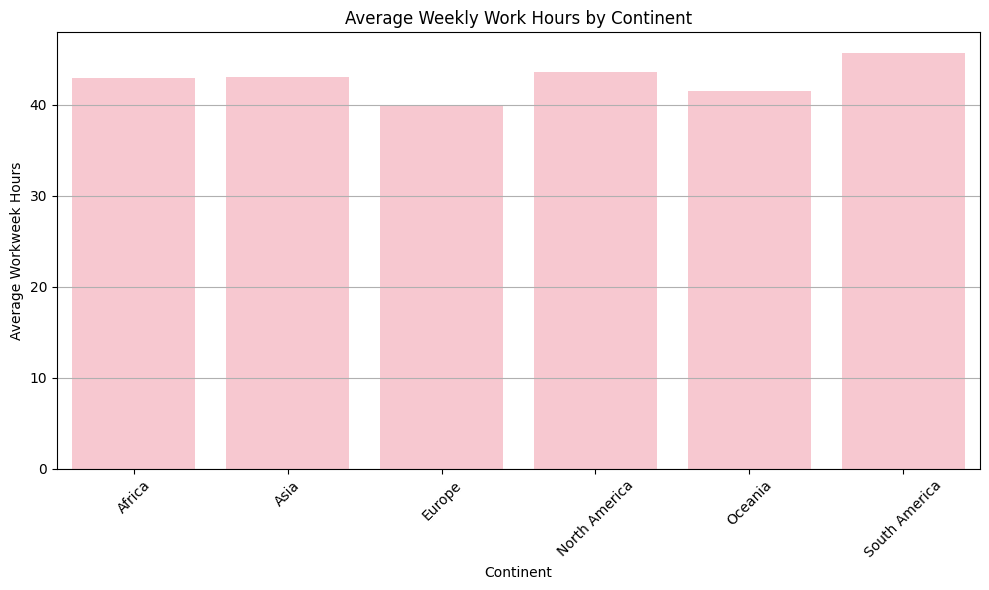

In [ ]:
#Continent Analysis (Noshin Rahman)
# Group by continent and calculate average work hours
avg_hours_by_continent = df.groupby('Continent')['workweek__hours'].mean().reset_index()
avg_hours_by_continent = avg_hours_by_continent.round(2)
avg_hours_by_continent.columns = ['continent', 'avg_work_hours']

#Table View
print("Average Weekly Work Hours by Continent")
display(avg_hours_by_continent)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_hours_by_continent, x='continent', y='avg_work_hours', color='pink')
plt.title('Average Weekly Work Hours by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Workweek Hours')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()




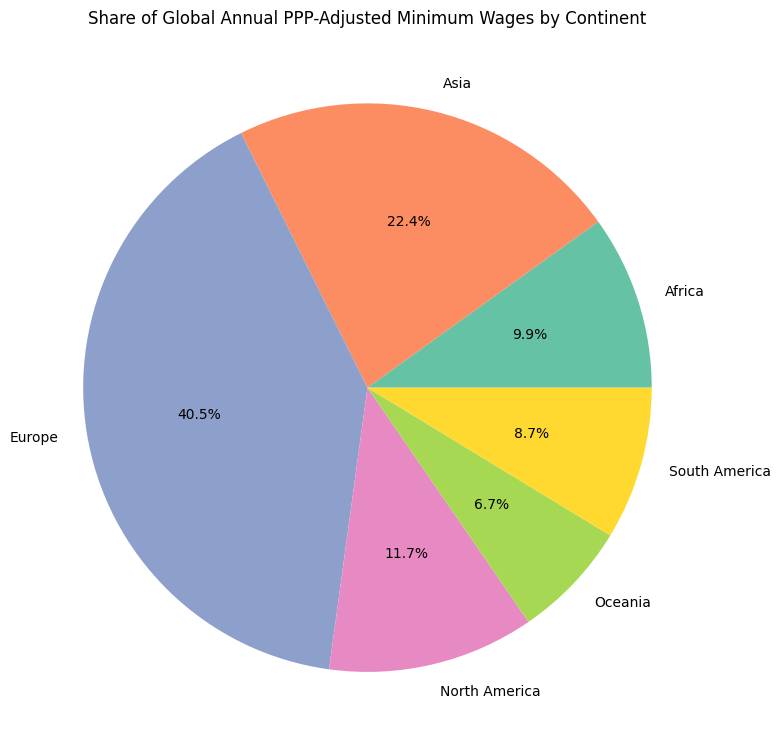

In [ ]:
ppp_by_continent = df.groupby('Continent')['annual_ppp_int$'].sum().reset_index()
import matplotlib.pyplot as plt

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    ppp_by_continent['annual_ppp_int$'],
    labels=ppp_by_continent['Continent'],
    autopct='%1.1f%%',
    colors=plt.cm.Set2.colors
)

plt.title('Share of Global Annual PPP-Adjusted Minimum Wages by Continent')
plt.tight_layout()
plt.show()



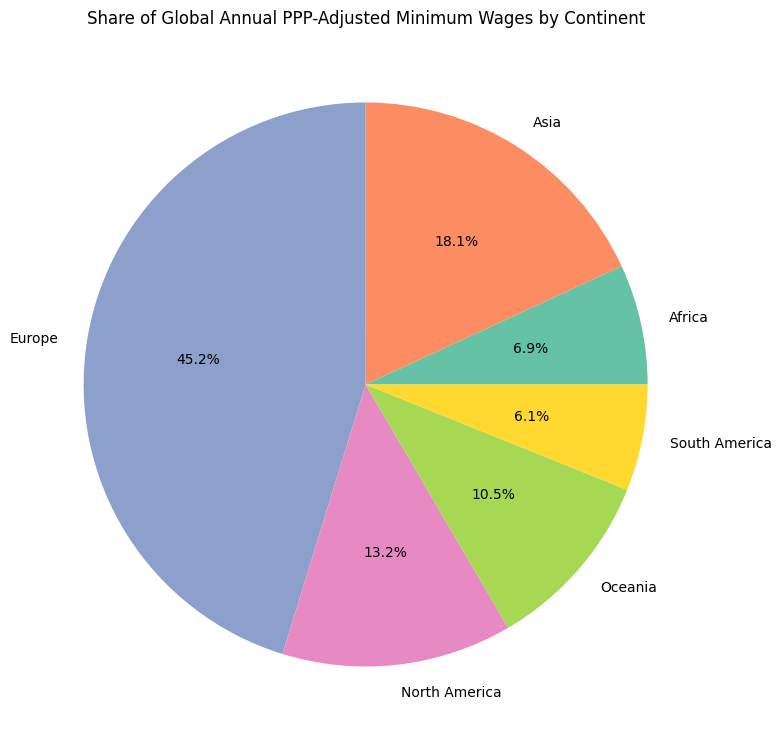

In [ ]:
ppp_by_continent = df.groupby('Continent')['annual_nominal_us$'].sum().reset_index()
import matplotlib.pyplot as plt

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    ppp_by_continent['annual_nominal_us$'],
    labels=ppp_by_continent['Continent'],
    autopct='%1.1f%%',
    colors=plt.cm.Set2.colors
)

plt.title('Share of Global Annual PPP-Adjusted Minimum Wages by Continent')
plt.tight_layout()
plt.show()



In [ ]:
df

,country,annual_nominal_us$,annual_ppp_int$,workweek__hours,hourly_nominal_us$,hourly_ppp_int$,percent_of__gdp_per_capita,effective_per,Continent,ppp_ratio,ppp_diff
0,Afghanistan,1047.0,3272.0,40.0,0.50,1.57,168.30%,2017,Asia,3.140000,1.07
1,Albania,2418.0,5218.0,40.0,1.16,2.51,45.20%,2017,Europe,2.163793,1.35
2,Algeria,2163.0,6247.0,40.0,1.04,3.00,41.60%,2020,Africa,2.884615,1.96
3,Andorra,14243.0,11020.0,40.0,6.85,5.30,28%,2019,Europe,0.773723,-1.55
4,Angola,1681.0,2108.0,44.0,0.73,0.92,32.70%,2019,Africa,1.260274,0.19
...,...,...,...,...,...,...,...,...,...,...,...
139,Uruguay,7502.0,9183.0,48.0,3.01,3.68,42.50%,2021,South America,1.222591,0.67
140,Uzbekistan,2969.0,7954.0,40.0,1.43,3.82,122.10%,2019,Asia,2.671329,2.39
141,Vanuatu,3331.0,3041.0,40.0,1.60,1.46,98.70%,2012,Oceania,0.912500,-0.14
142,Vietnam,1526.0,3676.0,40.0,0.73,1.77,58.40%,2018,Asia,2.424658,1.04
